# Preprocessing of vagal multiome data colleceted upon ovalbumin challenge

Credit: Emily Robinson (Prescott Lab)

5 Conditions:

1) NT
2) PBS
3) OVA
4) PBS_Chase
5) OVA_Chase

## 0. Imports

In [1]:
library(Seurat)
library(Signac)
library(GenomicFeatures)
library(EnsDb.Mmusculus.v79)
library(Rsamtools)
library(tidyverse)
library(viridis)
library(dplyr)
library(ggplot2)
library(ggpointdensity)
library(ggExtra)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following obj

In [2]:
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

In [3]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.9 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /home/luoxingj/miniconda3/envs/single_cell/lib/libopenblasp-r0.3.29.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1             ggpointdensity_0.1.0      
 [3] viridis_0.6.5              viridisLite_0.4.2         
 [5] lubridate_1.9.3            forcats_1.0.0             
 [7] stri

In [4]:
# Preprocessing function is in this R script

# No QC filters are applied here (except a basic min_cells_atac hyperparameter). This is just to create the multiome Seurat objects.
source('/home/luoxingj/asthma_collab/scripts/0_Multiome_Preprocessing/Multiome_Preprocessing_Standard_Function.R')

## 1. Paths

In [5]:
master_data_dir = '/bap/bap/collab_asthma_multiome/'

In [6]:
# -------------------
# Sample 1: NT
# -------------------
nt_rna_data_dir <- file.path(master_data_dir, "RNA", "1_NT_filtered_feature_bc_matrix")
nt_atac_fragments_file <- file.path(master_data_dir, "ATAC", "ATACFragmentFiles_Asthma", "NT", "NT_atac_fragments.tsv.gz")

# -------------------
# Sample 2: PBS
# -------------------
pbs_rna_data_dir <- file.path(master_data_dir, "RNA", "2_PBS_filtered_feature_bc_matrix")
pbs_atac_fragments_file <- file.path(master_data_dir, "ATAC", "ATACFragmentFiles_Asthma", "PBS", "PBS_atac_fragments.tsv.gz")

# -------------------
# Sample 3: OVA
# -------------------
ova_rna_data_dir <- file.path(master_data_dir, "RNA", "3_OVA_filtered_feature_bc_matrix")
ova_atac_fragments_file <- file.path(master_data_dir, "ATAC", "ATACFragmentFiles_Asthma", "OVA", "OVA_atac_fragments.tsv.gz")

# -------------------
# Sample 4: PBS_Chase
# -------------------
pbs_chase_rna_data_dir <- file.path(master_data_dir, "RNA", "4_PBS_C_filtered_feature_bc_matrix")
pbs_chase_atac_fragments_file <- file.path(master_data_dir, "ATAC", "ATACFragmentFiles_Asthma", "PBS_C", "PBSC_atac_fragments.tsv.gz")

# -------------------
# Sample 5: OVA_Chase
# -------------------
ova_chase_rna_data_dir <- file.path(master_data_dir, "RNA", "5_OVA_C_filtered_feature_bc_matrix")
ova_chase_atac_fragments_file <- file.path(master_data_dir, "ATAC", "ATACFragmentFiles_Asthma", "OVA_C", "OVAC_atac_fragments.tsv.gz")


In [7]:
# Path to reference dataset
reference_data_path <- "/bap/bap/collab_asthma_multiome/AggregatedData_190717_v2.RData"

reference_data_path

[1] "/bap/bap/collab_asthma_multiome/AggregatedData_190717_v2.RData"

In [8]:
# output path
output_dir <- file.path(master_data_dir, "outputs", "ATAC", "1_Combined_Preprocessing_Outputs")

if (!dir.exists(output_dir)) {
  dir.create(output_dir, recursive = TRUE)
}

In [9]:
output_dir

[1] "/bap/bap/collab_asthma_multiome//outputs/ATAC/1_Combined_Preprocessing_Outputs"

## 2. Process objects

### 2.1 Define preprocessing function

In [10]:
# Now done in R script (sourced above)

### 2.2 Preprocess each condition sample

In [11]:
# ---------------------------------------------------------------------------
# Example usage for each of your samples:

# 1) NT
NT <- createRNA_ATAC_Seurat(
  feature_matrix_dir = nt_rna_data_dir,
  fragments_path     = nt_atac_fragments_file
)

10X data contains more than one type and is being returned as a list containing matrices of each type.

Computing hash



In [12]:
# 2) PBS
PBS <- createRNA_ATAC_Seurat(
  feature_matrix_dir = pbs_rna_data_dir,
  fragments_path     = pbs_atac_fragments_file
)


10X data contains more than one type and is being returned as a list containing matrices of each type.

Computing hash



In [13]:
# 3) OVA
OVA <- createRNA_ATAC_Seurat(
  feature_matrix_dir = ova_rna_data_dir,
  fragments_path     = ova_atac_fragments_file
)


10X data contains more than one type and is being returned as a list containing matrices of each type.

Computing hash



In [14]:
# 4) PBS_C (PBS Chase)
PBS_C <- createRNA_ATAC_Seurat(
  feature_matrix_dir = pbs_chase_rna_data_dir,
  fragments_path     = pbs_chase_atac_fragments_file
)



10X data contains more than one type and is being returned as a list containing matrices of each type.

Computing hash



In [15]:
# 5) OVA_C (OVA Chase)
OVA_C <- createRNA_ATAC_Seurat(
  feature_matrix_dir = ova_chase_rna_data_dir,
  fragments_path     = ova_chase_atac_fragments_file
)

10X data contains more than one type and is being returned as a list containing matrices of each type.

Computing hash



In [16]:
# Inspect each object

print(NT)
print(PBS)
print(OVA)
print(PBS_C)
print(OVA_C)

An object of class Seurat 
272264 features across 2181 samples within 2 assays 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC
An object of class Seurat 
283980 features across 2811 samples within 2 assays 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC
An object of class Seurat 
269023 features across 2979 samples within 2 assays 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC
An object of class Seurat 
232109 features across 529 samples within 2 assays 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC
An object of class Seurat 
260844 features across 1788 samples within 2 assays 
Active assay: RNA (32285 features, 0 variable features)
 1 layer present: counts
 1 other assay present: ATAC


## 3. Merge objects and visualize cells

In [17]:
multiome.combined <- merge(NT, y = list(PBS, OVA, PBS_C, OVA_C), add.cell.ids = c("NT", "PBS", "OVA", "PBS_C", "OVA_C"))

multiome.combined


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows


Binding matrix rows



An object of class Seurat 
340821 features across 10288 samples within 2 assays 
Active assay: RNA (32285 features, 0 variable features)
 5 layers present: counts.1, counts.2, counts.3, counts.4, counts.5
 1 other assay present: ATAC

### 3.1 Define QC thresholds

May change later (increase stringency) but as first pass,

In [18]:
min_ncount_atac <- 1000
min_ncount_rna <- 1000
min_tss_enrich <- 2.5
max_nucleosome_signal <- 2.0

max_ncount_atac <- quantile(multiome.combined$nCount_ATAC, prob=0.95)
max_ncount_rna <- quantile(multiome.combined$nCount_RNA, prob=0.95)

print(paste('Max nCount_ATAC: ', max_ncount_atac))
print(paste('Max nCount_RNA: ', max_ncount_rna))

[1] "Max nCount_ATAC:  115440.95"
[1] "Max nCount_RNA:  64823.15"


### 3.2 Perform QC

In [19]:
DefaultAssay(multiome.combined) <- "ATAC"

multiome.combined <- NucleosomeSignal(multiome.combined)
multiome.combined <- TSSEnrichment(multiome.combined, fast=FALSE)

multiome.combined

Extracting TSS positions

Finding + strand cut sites

Finding - strand cut sites

Computing mean insertion frequency in flanking regions

Normalizing TSS score



An object of class Seurat 
340821 features across 10288 samples within 2 assays 
Active assay: ATAC (308536 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

In [20]:
# Function will use 'mt' instead of 'MT'
grep ("^mt-", rownames(multiome.combined[["RNA"]]),value = T)

[1] "mt-Nd1"  "mt-Nd2"  "mt-Co1"  "mt-Co2"  "mt-Atp8" "mt-Atp6" "mt-Co3" 
 [8] "mt-Nd3"  "mt-Nd4l" "mt-Nd4"  "mt-Nd5"  "mt-Nd6"  "mt-Cytb"

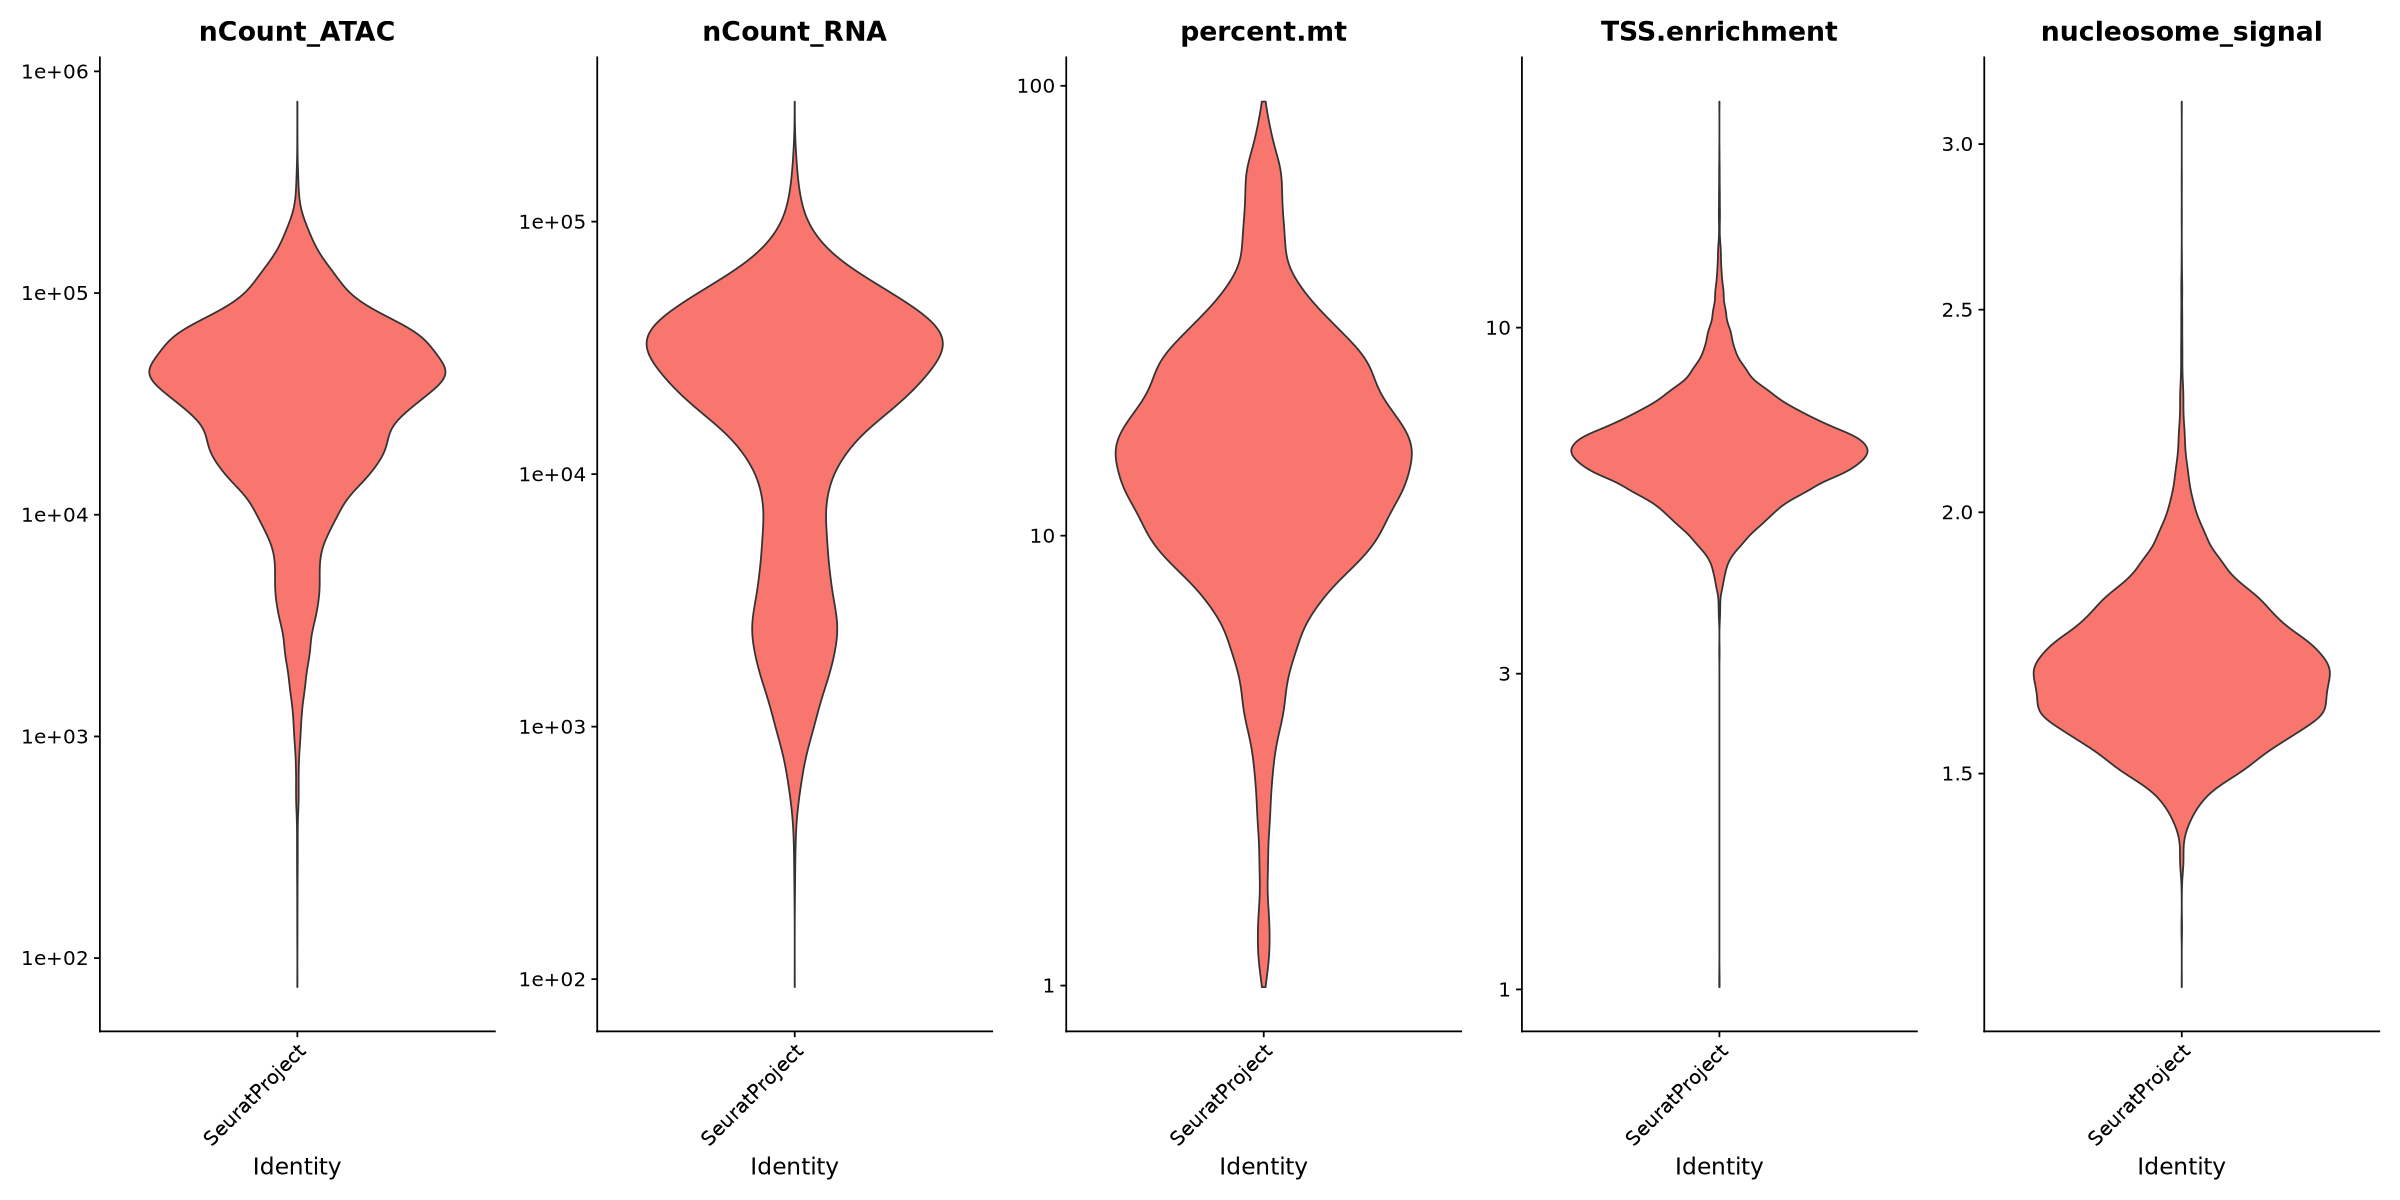

In [21]:
# Plot out QC metrics
options(repr.plot.width=20, repr.plot.height=10)
VlnPlot(multiome.combined, features = c("nCount_ATAC", 
                                        "nCount_RNA", 
                                        "percent.mt",
                                        "TSS.enrichment",
                                        "nucleosome_signal"), 
                                        ncol = 5,
                                        log = TRUE, pt.size = 0) + NoLegend()


In [22]:
# Filter out low quality cells

# Due to known experimental issues with mitochondrial content and to preserve enough cells, we will not filter on percent.mt
multiome.combined.filt <- subset(
  x = multiome.combined,
  subset = TSS.enrichment > min_tss_enrich &
           nCount_ATAC > min_ncount_atac &
           nCount_ATAC < max_ncount_atac &
           nCount_RNA > min_ncount_rna &
           nCount_RNA < max_ncount_rna &
           nucleosome_signal < max_nucleosome_signal 
          # percent.mt < 10

)


multiome.combined.filt

An object of class Seurat 
340821 features across 9088 samples within 2 assays 
Active assay: ATAC (308536 features, 0 variable features)
 2 layers present: counts, data
 1 other assay present: RNA

In [23]:
options(repr.plot.width=10, repr.plot.height=5)

# Custom theme modifications
theme_custom <- theme_bw() + 
  theme(
    text = element_text(size=24), # Set text to Arial and increase size
    axis.title = element_text(size=32), # Double size for axis titles
    axis.text = element_text(size=16),  # Double size for axis text
    panel.border = element_rect(size=2),  # Thicker plot borders
    panel.grid = element_blank()  # Remove gridlines
  )

# Create scatter plots with modified themes
scatter1 <- ggplot(multiome.combined@meta.data, aes(x=nCount_ATAC, y=TSS.enrichment)) +
  geom_pointdensity() +
  scale_color_viridis() +
  theme_custom +
  geom_vline(xintercept=min_ncount_atac, size=1, color='red') +
  geom_hline(yintercept=min_tss_enrich, size=1, color='red') +
  geom_vline(xintercept=max_ncount_atac, size=1, color='red') +
  xlim(0, max_ncount_atac + 20000) +
  ylim(0, 10)

scatter2 <- ggplot(multiome.combined@meta.data, aes(x=nCount_ATAC, y=TSS.enrichment)) +
  geom_pointdensity() +
  scale_color_viridis() +
  theme_custom +
  geom_vline(xintercept=min_ncount_atac, size=1, color='red') +
  geom_hline(yintercept=min_tss_enrich, size=1, color='red') +
  geom_vline(xintercept=max_ncount_atac, size=1, color='red') +
  xlim(0, min_ncount_atac + 10000) +
  ylim(0, 10)

# Add marginal histograms with custom settings
scatter1_marg <- ggMarginal(scatter1, type="histogram", bins=100, fill="lightblue")
scatter2_marg <- ggMarginal(scatter2, type="histogram", bins=100, fill="lightblue")


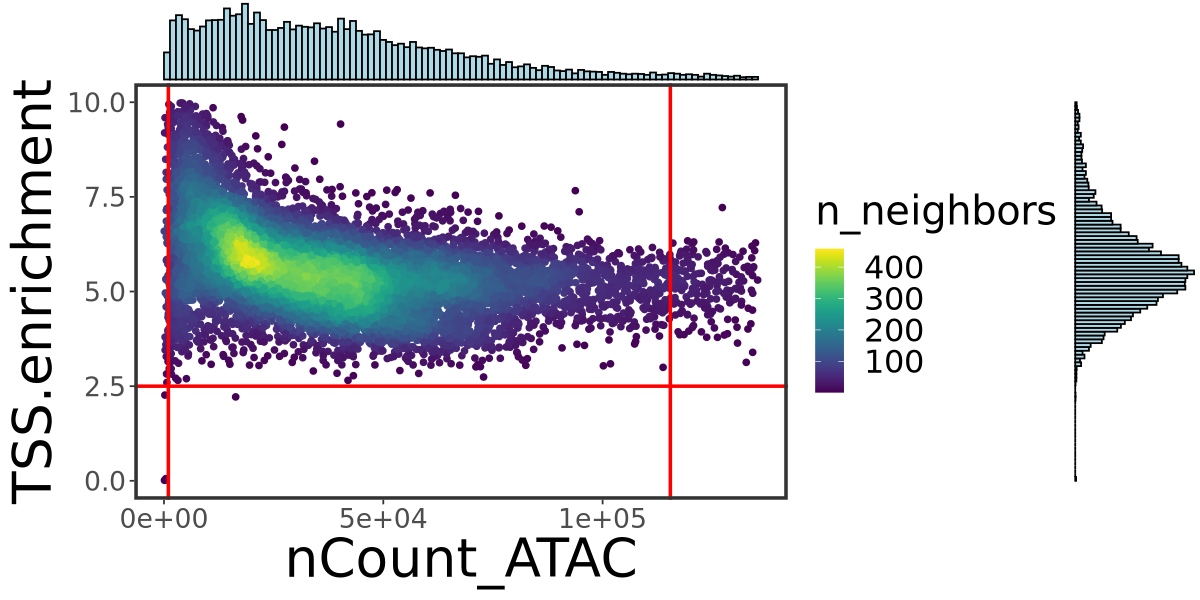

In [24]:
scatter1_marg

## 4. RNA

### 4.1 Basic preprocessing

In [25]:
# # RNA analysis
# DefaultAssay(multiome.combined) <- "RNA"
# multiome.combined <- NormalizeData(multiome.combined)
# multiome.combined <- FindVariableFeatures(multiome.combined)
# multiome.combined <- ScaleData(multiome.combined)
# multiome.combined <- RunPCA(multiome.combined)
# multiome.combined <- RunUMAP(multiome.combined, dims = 1:30)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

16:54:55 UMAP embedding parameters a = 0.9922 b = 1.112

16:54:55 Read 10288 rows and found 49 numeric columns

16:54:55 Using Annoy for neighbor search, n_neighbors = 30

16:54:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:54:56 Writing NN index file to temp file /tmp/RtmpHkTz4b/file1810075752c5fc

16:54:56 Searching Annoy index using 1 thread, search_k = 3000

16:54:59 Annoy recall = 100%

16:55:03 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

16:55:06 Initializing from normalized Laplacian + noise (using RSpectra)

16:55:06 Commencing optimization for 200 epochs, with 401078 positive edges

16:55:13 Optimization finished



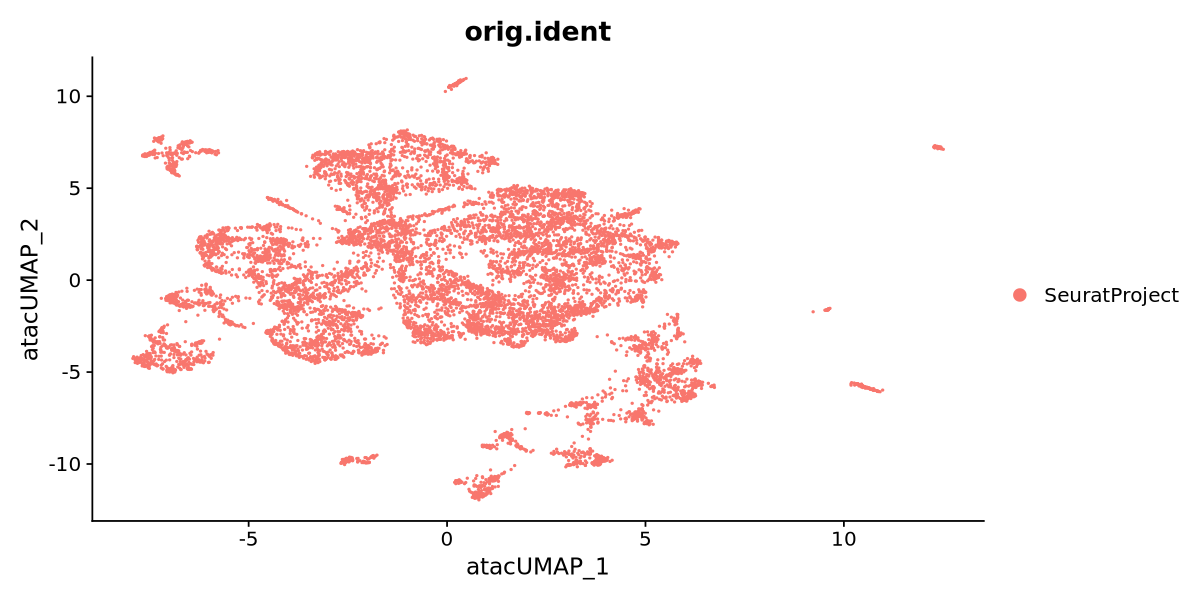

In [26]:
# ATAC analysis
# We exclude the first dimension as this is typically correlated with sequencing depth
DefaultAssay(multiome.combined) <- "ATAC"
multiome.combined  <- RunTFIDF(multiome.combined )
multiome.combined  <- FindTopFeatures(multiome.combined , min.cutoff = 'q0')
multiome.combined  <- RunSVD(multiome.combined)
multiome.combined  <- RunUMAP(multiome.combined , reduction = 'lsi', dims = 2:50, reduction.name = "umap.atac", reduction.key = "atacUMAP_")
DimPlot(multiome.combined, group.by = "orig.ident", label = FALSE)

In [27]:
# quantify gene activity
DefaultAssay(multiome.combined) <- "ATAC"
gene.activities <- GeneActivity(multiome.combined)

# add gene activities as a new assay
multiome.combined[["ACTIVITY"]] <- CreateAssayObject(counts = gene.activities)


Extracting gene coordinates

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions



### 4.2 Inspect Vglut2 (`Slc17a6`) expression

Normalizing layer: counts.1

Normalizing layer: counts.2

Normalizing layer: counts.3

Normalizing layer: counts.4

Normalizing layer: counts.5

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Centering and scaling data matrix

PC_ 1 
Positive:  Apoe, Fabp7, Lgals1, Plp1, Timp3, Cebpd, Cdh19, Itgb8, Crip1, Ccn1 
	   Adamts5, Sox2ot, Phlda1, Pde7b, Sorcs1, Hspa1b, Prex2, Zfp36, Fbln2, Ifitm3 
	   Wwtr1, Id3, Itgav, S100a11, Gas7, Ifrd1, Irf1, Cxcl10, Ptn, Zfp36l1 
Negative:  Phf24, Gabbr2, Syt7, Dgkh, Plxnc1, Trim36, Kctd16, Osbpl3, Kcnh7, Parm1 
	   Grik1, Rims1, Acpp, Kctd8, Tmtc1, Eml1, Zfp385b, Hs6st3, Pou4f1, Magi3 
	   Kcnt1, Rgs7bp, Dok4, Prrxl1, Gm49678, Mmp25, Nwd2, Casz1, Rbfox3, Adam11 
PC_ 2 
Positive:  Enah, Kcnq3, Unc5c, Cntn5, Vat1l, Fgf14, F2r, Fgf1, P2rx2, Agbl4 
	   Ngfr, Rgs9, Slc2a13, Etv

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 10288
Number of edges: 362816

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9010
Number of communities: 29
Elapsed time: 0 seconds


UMAP will return its model

17:07:55 UMAP embedding parameters a = 0.9922 b = 1.112

17:07:55 Read 10288 rows and found 20 numeric columns

17:07:55 Using Annoy for neighbor search, n_neighbors = 30

17:07:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:07:56 Writing NN index file to temp file /tmp/RtmpHkTz4b/file18100742e2679e

17:07:56 Searching Annoy index using 1 thread, search_k = 3000

17:07:58 Annoy recall = 100%

17:08:00 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:08:02 Initializing from normalized Laplacian + noise (using RSpectra)

17:08:02 Commencing optimization for 200 epochs, with 429454 positive edges

17:08:08 Optimization finished



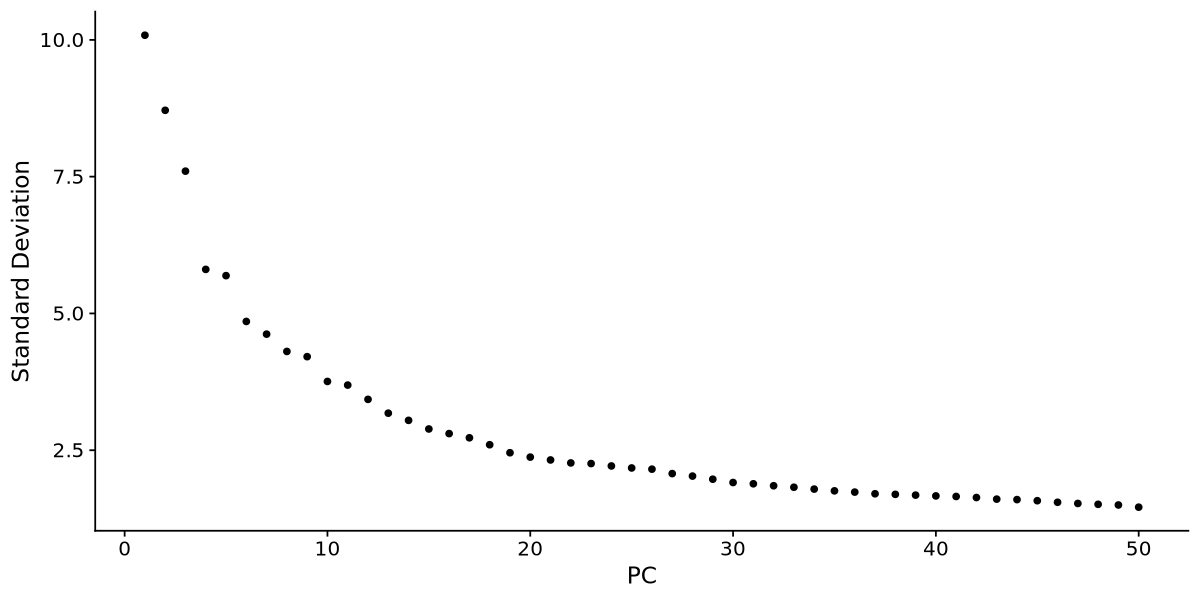

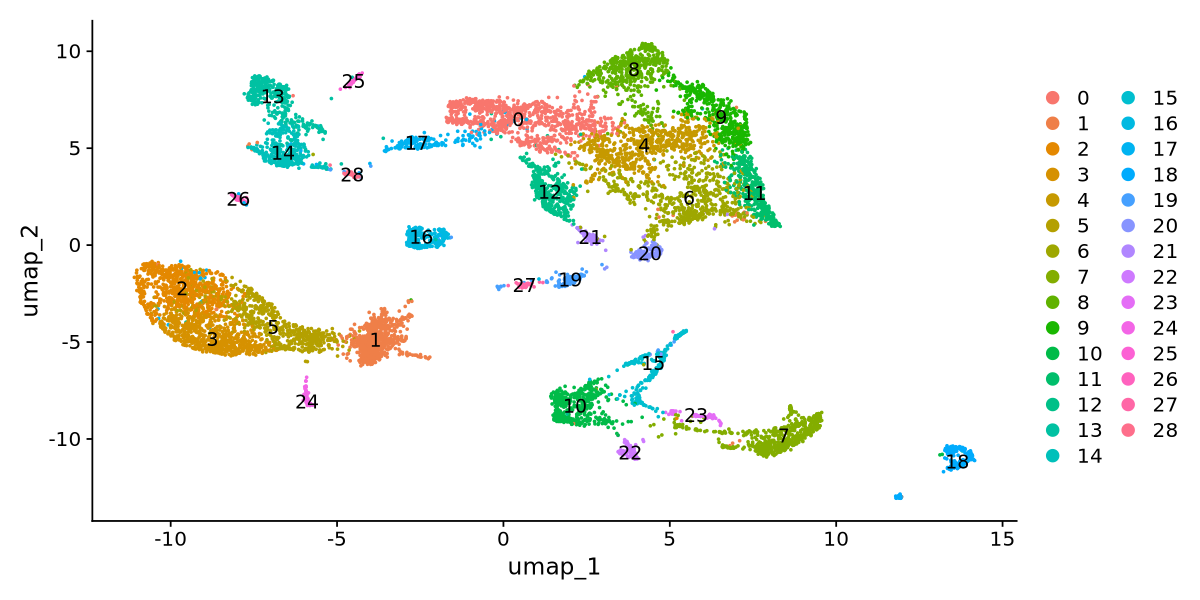

In [28]:
DefaultAssay(multiome.combined) <- "RNA"

multiome.combined <- NormalizeData(multiome.combined)
multiome.combined <- FindVariableFeatures(object =  multiome.combined, selection.method = "vst", nfeatures = 2000)

all.genes <- rownames(x =  multiome.combined)

# Scale the data and run PCA
multiome.combined <- ScaleData(object =  multiome.combined, features = all.genes)
multiome.combined <- RunPCA(object =  multiome.combined, features = VariableFeatures(object =  multiome.combined))
print(ElbowPlot(object =  multiome.combined, ndims = 50))

# Run UMAP and clustering
multiome.combined <- FindNeighbors(object =  multiome.combined, dims = 1:20)
multiome.combined <- FindClusters(object =  multiome.combined, resolution = 1.0) #2.0 before
multiome.combined <- RunUMAP(object =  multiome.combined, dims = 1:20, return.model=TRUE)

# Visualize embedding
DimPlot(object =  multiome.combined, reduction = "umap", label=TRUE, pt.size = 0.25)

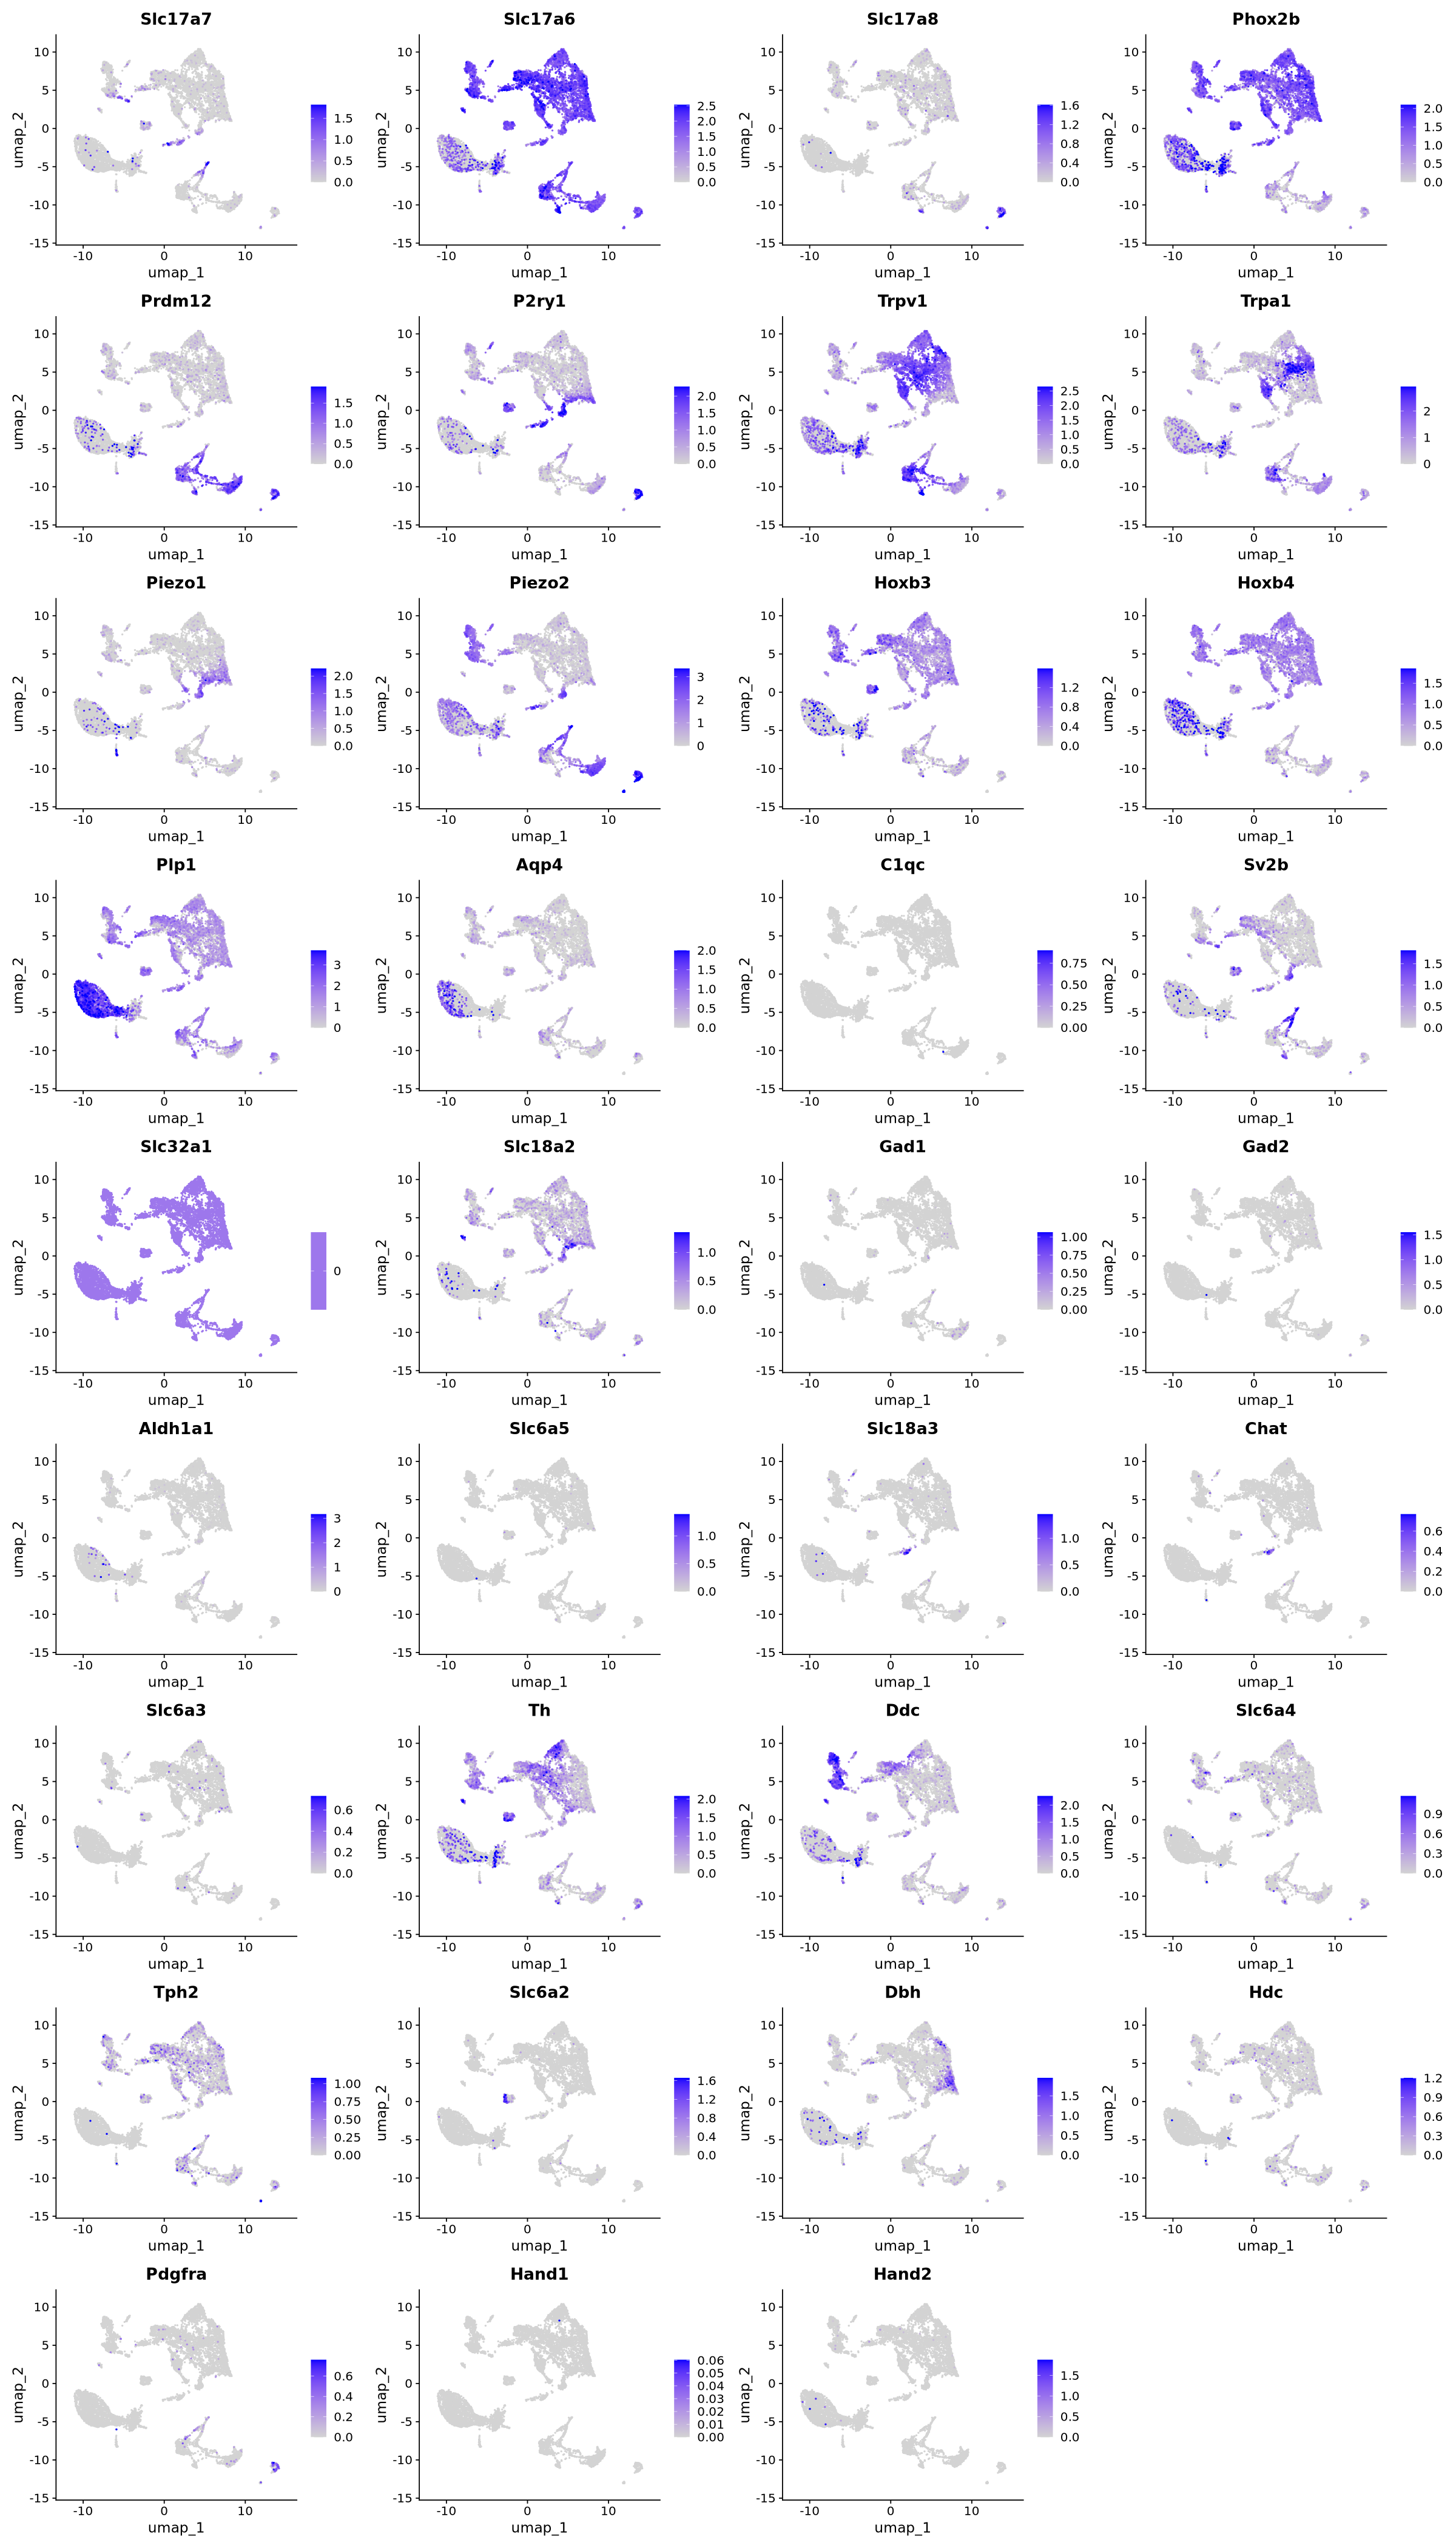

In [29]:
options(repr.plot.width=20, repr.plot.height=35)
FeaturePlot(object= multiome.combined, features = c("Slc17a7",  # Vglut1, Glutamatergic (Glut)
                                                    "Slc17a6",  # Vglut2, Glutamatergic (Glut)
                                                    "Slc17a8",  # Vglut3, Glutamatergic (Glut)
                                                    "Phox2b",   # nodose and inferior petrosal ganglia 
                                                    "Prdm12",   # jugular and superior glossopharyngeal ganglia
                                                    "P2ry1",
                                                    "Trpv1",    # Trpv1+ cells
                                                    "Trpa1",    # Trpa1+ cells
                                                    "Piezo1",   # Piezo1+ cells
                                                    "Piezo2",   # Piezo2+ cells
                                                    "Hoxb3",    # "Hoxb3 gene is expressed in the vagal neural crest and in the enteric ganglia of the developing gut during embryogenesis" (PMID  15768390)
                                                    "Hoxb4",
                                                    "Plp1",    # Oligodendrocytes
                                                    "Aqp4",    # Astrocytes
                                                    "C1qc",    # Microglia
                                                    "Sv2b",    # Excitatory Neurons
                                                    "Slc32a1", # Vgat, GABAergic (GABA)
                                                    "Slc18a2", # VMAT2, GABAergic (GABA)
                                                    "Gad1",    # GABAergic (GABA)
                                                    "Gad2",    # GABAergic (GABA)
                                                    "Aldh1a1", # GABAergic (GABA)
                                                    "Slc6a5",  # Glycinergic (Glyc)
                                                    "Slc18a3", # Vacht, Cholinergic (Chol)
                                                    "Chat",    # Cholinergic (Chol)
                                                    "Slc6a3",  # Dat, Dopaminergic (Dopa)
                                                    "Th",      # Dopaminergic (Dopa)
                                                    "Ddc",     # Dopaminergic (Dopa)
                                                    "Slc6a4",  # Sert, Serotonergic (Sero)
                                                    "Tph2",    # Serotonergic (Sero)
                                                    "Slc6a2",  # Net, Noradrenergic (Nora)
                                                    "Dbh",     # Noradrenergic (Nora)
                                                    "Hdc",     # Histaminergic (Hist)
                                                    "Pdgfra",
                                                    "Hand1",
                                                    "Hand2"    # Sympathetic ganglia
               ), ncol = 4, order = T, min.cutoff = 0, max.cutoff = 'q99', slot = 'data')


# "Phox2b, a marker for epibranchial placode-derived sensory neurons" (Prescott et al., 2020)
# "Prdm12, a neural crest transcription factor and marker for sensory neurons of the jugular and superior glossopharyngeal ganglia" (Prescott et al., 2020)

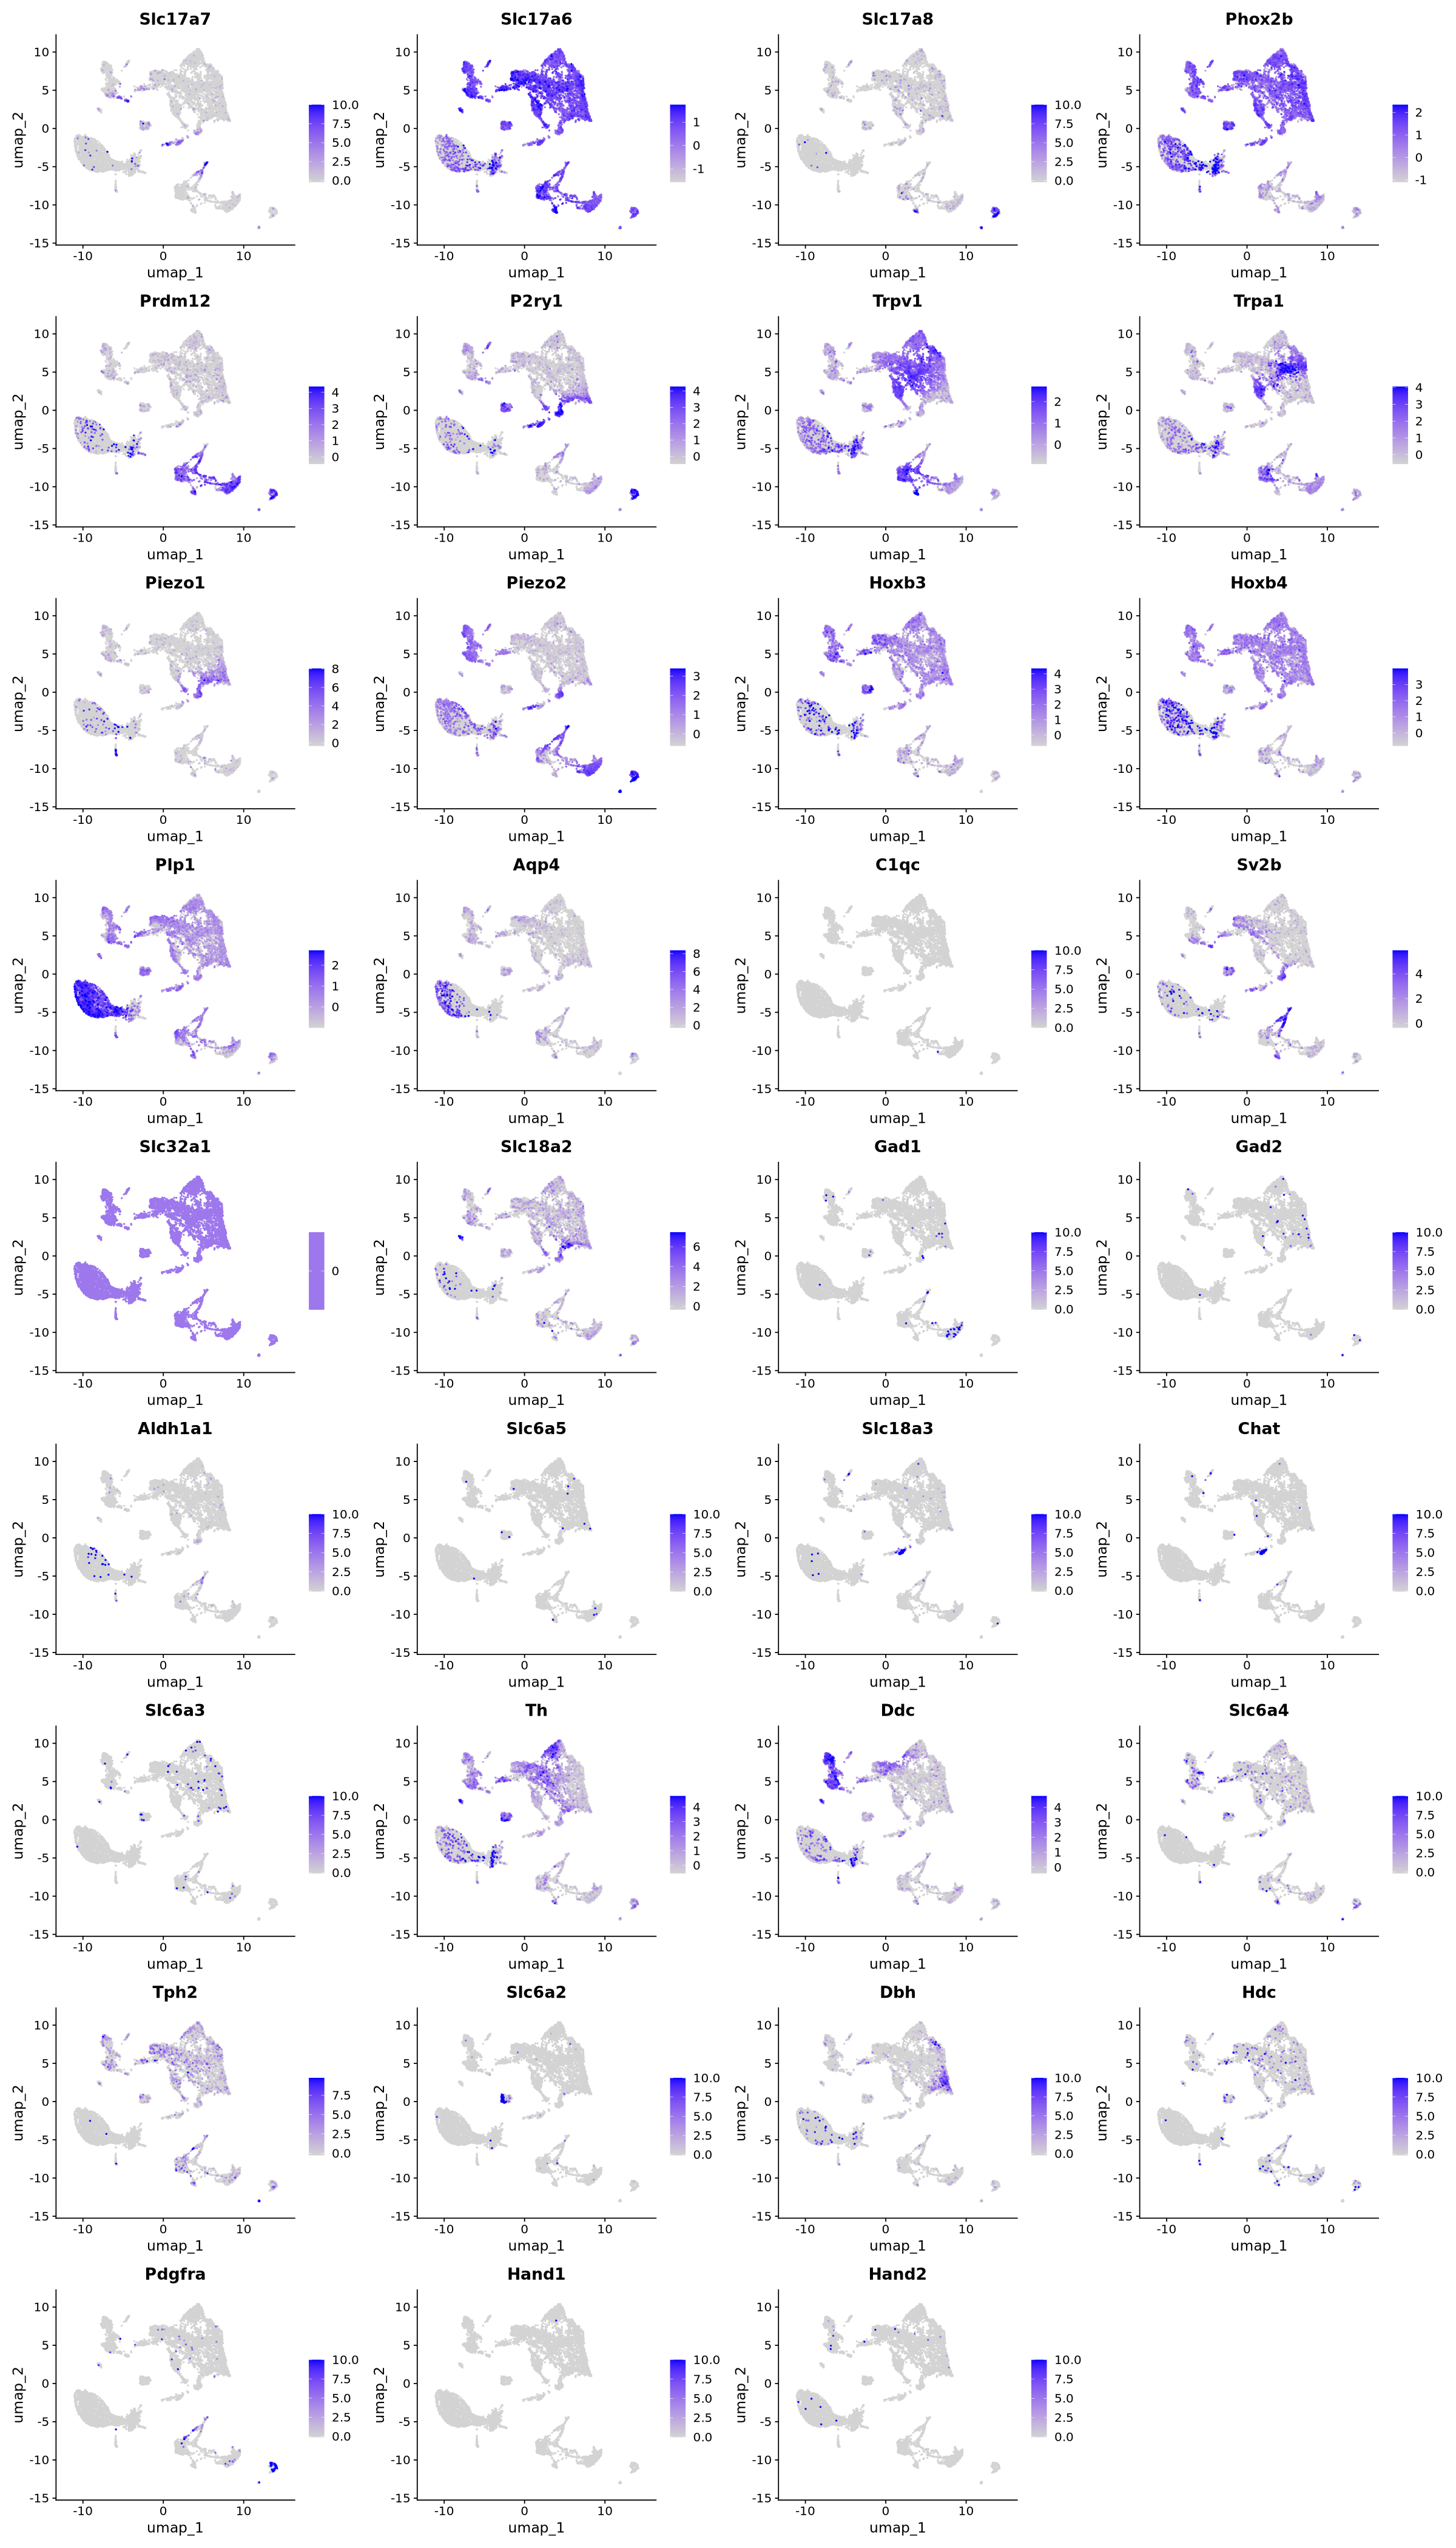

In [30]:
options(repr.plot.width=20, repr.plot.height=35)
FeaturePlot(object= multiome.combined, features = c("Slc17a7",  # Vglut1, Glutamatergic (Glut)
                                                    "Slc17a6",  # Vglut2, Glutamatergic (Glut)
                                                    "Slc17a8",  # Vglut3, Glutamatergic (Glut)
                                                    "Phox2b",   # nodose and inferior petrosal ganglia 
                                                    "Prdm12",   # jugular and superior glossopharyngeal ganglia
                                                    "P2ry1",
                                                    "Trpv1",    # Trpv1+ cells
                                                    "Trpa1",    # Trpa1+ cells
                                                    "Piezo1",   # Piezo1+ cells
                                                    "Piezo2",   # Piezo2+ cells
                                                    "Hoxb3",    # "Hoxb3 gene is expressed in the vagal neural crest and in the enteric ganglia of the developing gut during embryogenesis" (PMID  15768390)
                                                    "Hoxb4",
                                                    "Plp1",    # Oligodendrocytes
                                                    "Aqp4",    # Astrocytes
                                                    "C1qc",    # Microglia
                                                    "Sv2b",    # Excitatory Neurons
                                                    "Slc32a1", # Vgat, GABAergic (GABA)
                                                    "Slc18a2", # VMAT2, GABAergic (GABA)
                                                    "Gad1",    # GABAergic (GABA)
                                                    "Gad2",    # GABAergic (GABA)
                                                    "Aldh1a1", # GABAergic (GABA)
                                                    "Slc6a5",  # Glycinergic (Glyc)
                                                    "Slc18a3", # Vacht, Cholinergic (Chol)
                                                    "Chat",    # Cholinergic (Chol)
                                                    "Slc6a3",  # Dat, Dopaminergic (Dopa)
                                                    "Th",      # Dopaminergic (Dopa)
                                                    "Ddc",     # Dopaminergic (Dopa)
                                                    "Slc6a4",  # Sert, Serotonergic (Sero)
                                                    "Tph2",    # Serotonergic (Sero)
                                                    "Slc6a2",  # Net, Noradrenergic (Nora)
                                                    "Dbh",     # Noradrenergic (Nora)
                                                    "Hdc",     # Histaminergic (Hist)
                                                    "Pdgfra",
                                                    "Hand1",
                                                    "Hand2"    # Sympathetic ganglia
               ), ncol = 4, order = T, max.cutoff = 'q99', slot = 'scale.data')


# "Phox2b, a marker for epibranchial placode-derived sensory neurons" (Prescott et al., 2020)
# "Prdm12, a neural crest transcription factor and marker for sensory neurons of the jugular and superior glossopharyngeal ganglia" (Prescott et al., 2020)

### 4.3 Subset object to neurons

In [31]:
# #Subset out only cells that are neurons
# DefaultAssay(multiome.combined) <- "RNA"
# FeaturePlot(multiome.combined, features = "Slc17a6", reduction = "umap.atac", order = TRUE)
# multiome.combined$is_neuron <- ifelse(
#   LayerData(multiome.combined[["RNA"]], layer = "counts.1")["Slc17a6",] > 0,
#   "Neuron",
#   "Non-neuron"
# )

# multiome.combined$is_neuron <- ifelse(
#   LayerData(multiome.combined[["RNA"]], layer = "counts.2")["Slc17a6",] > 0,
#   "Neuron",
#   "Non-neuron"
# )


# multiome.combined$is_neuron <- ifelse(
#   LayerData(multiome.combined[["RNA"]], layer = "counts.3")["Slc17a6",] > 0,
#   "Neuron",
#   "Non-neuron"
# )

# multiome.combined$is_neuron <- ifelse(
#   LayerData(multiome.combined[["RNA"]], layer = "counts.4")["Slc17a6",] > 0,
#   "Neuron",
#   "Non-neuron"
# )
# multiome.combined$is_neuron <- ifelse(
#   LayerData(multiome.combined[["RNA"]], layer = "counts.5")["Slc17a6",] > 0,
#   "Neuron",
#   "Non-neuron"
# )

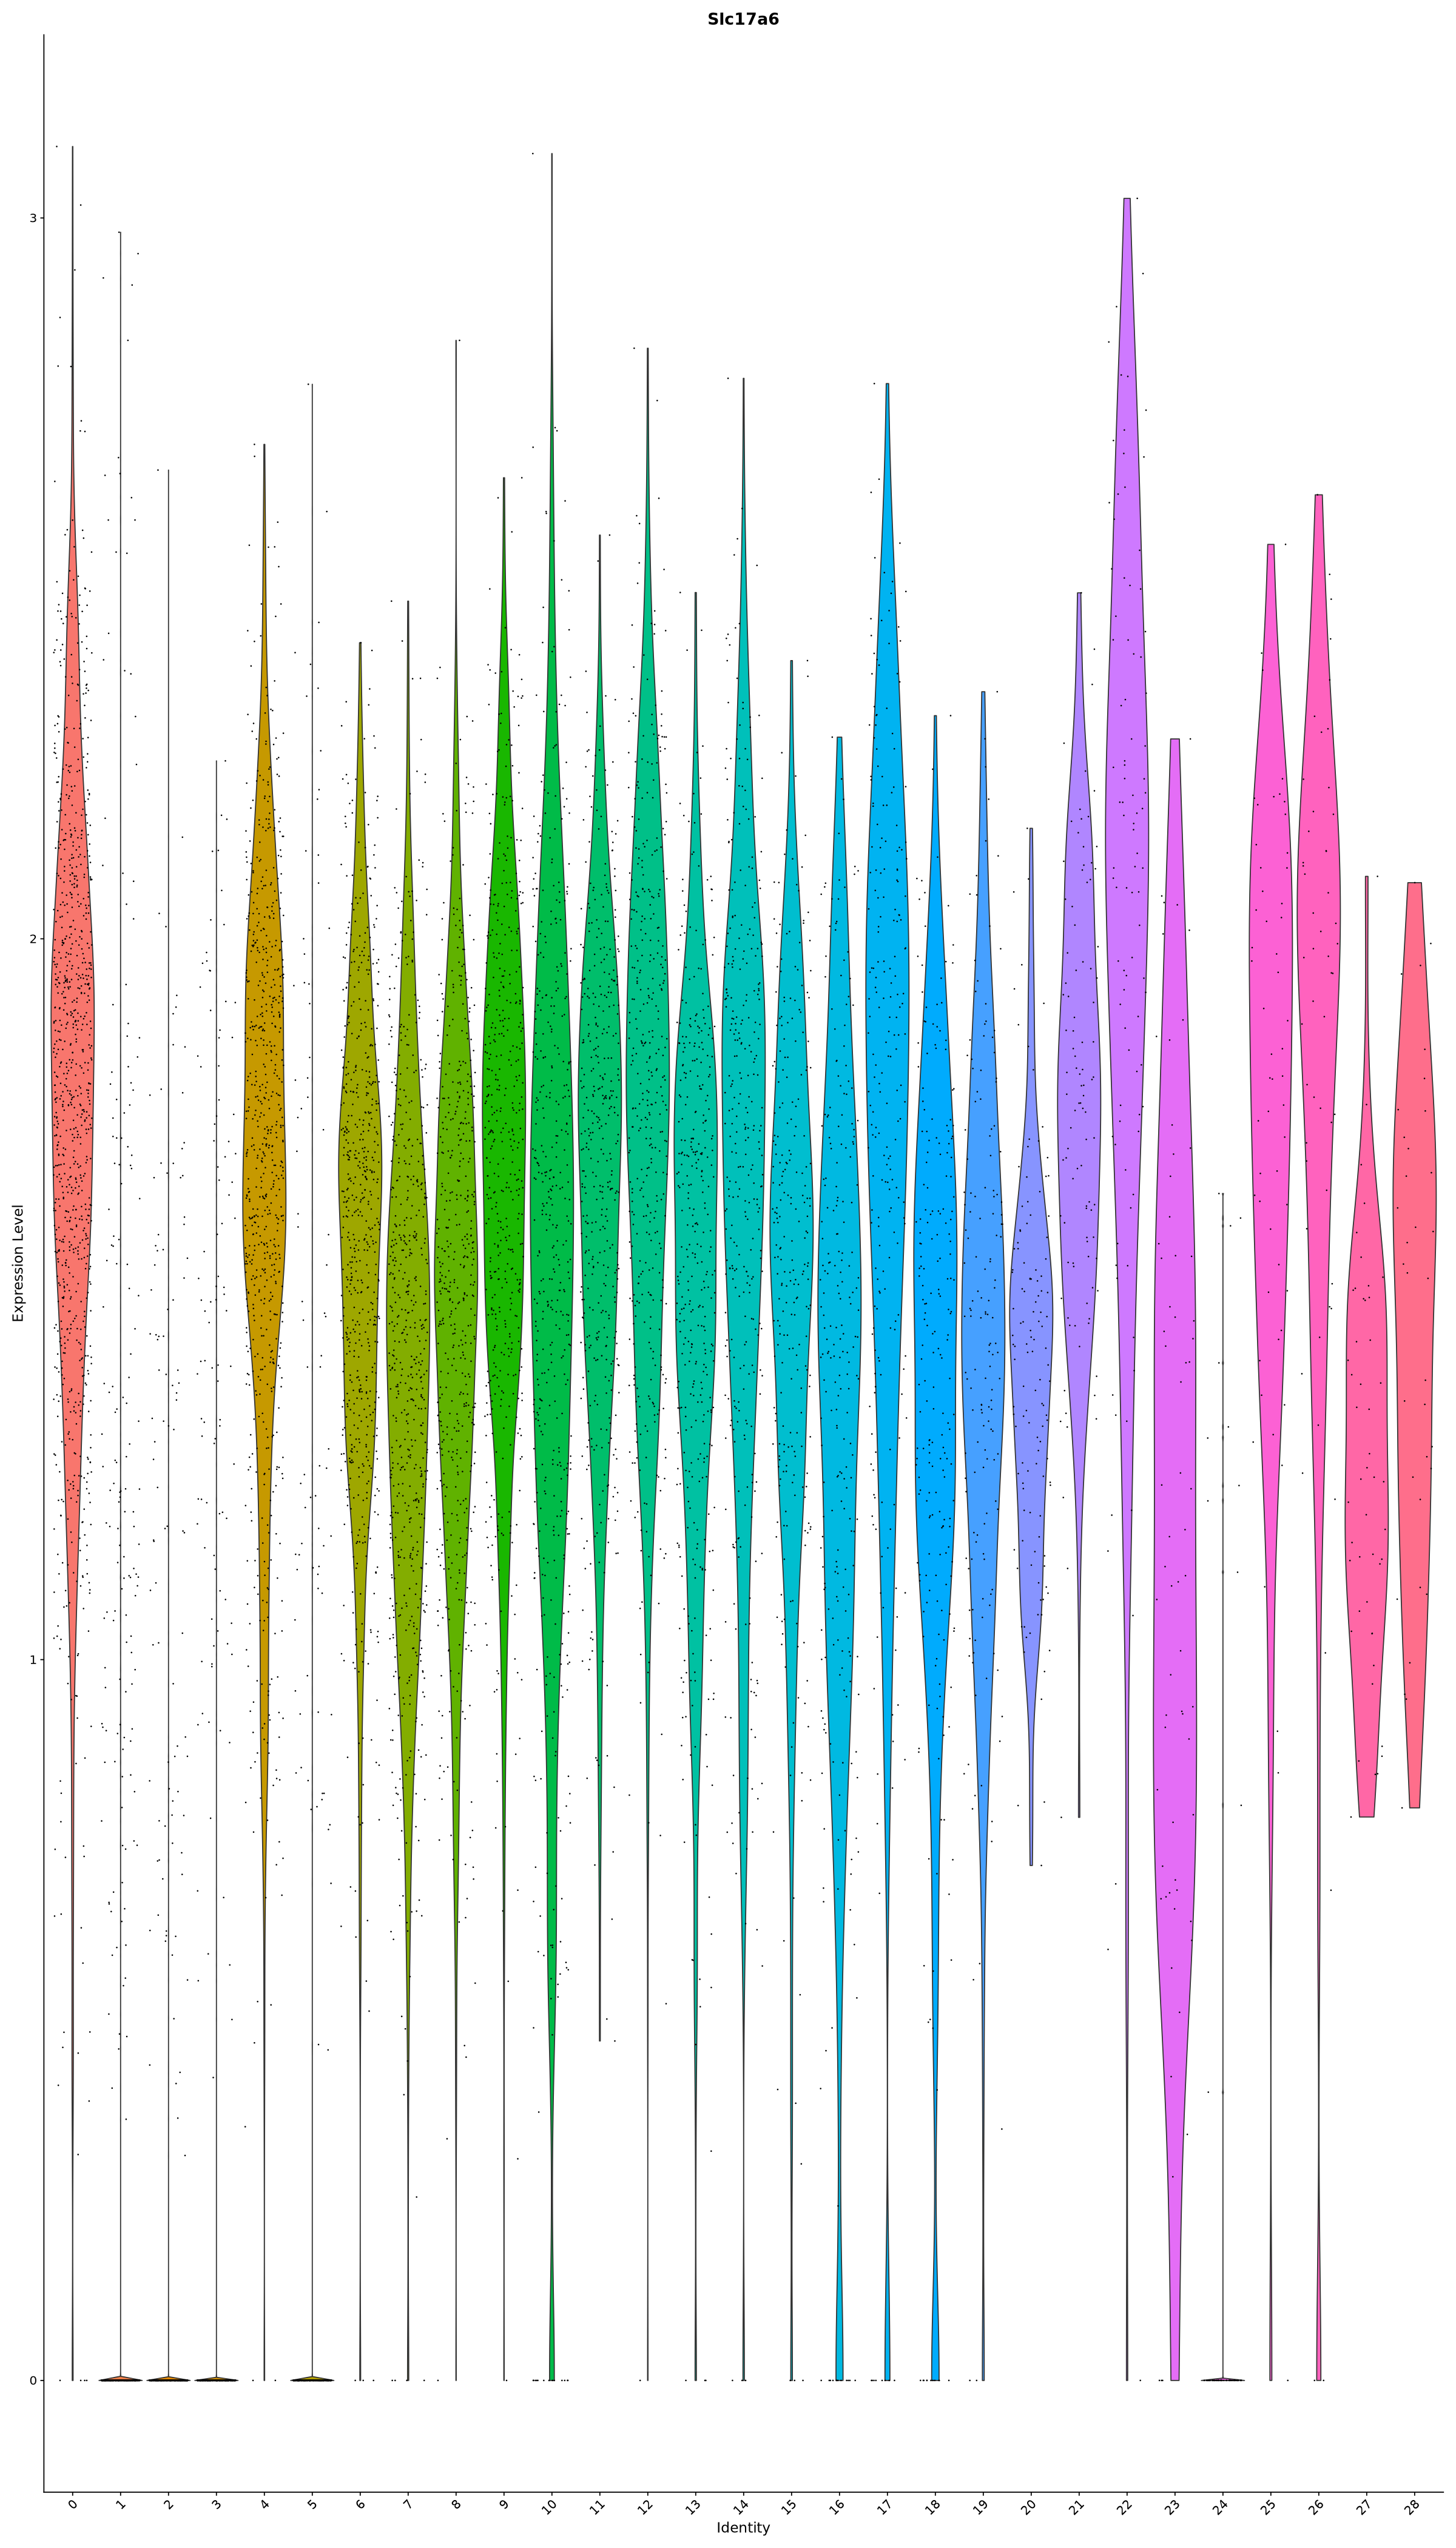

In [32]:
# Visualize Slc17a6 on violin plot, split by Leiden cluster

VlnPlot(multiome.combined, features = "Slc17a6", group.by = "seurat_clusters", pt.size = 0.1) + NoLegend()

In [33]:
Slc17a6_expression <- AverageExpression(object = multiome.combined, features = c("Slc17a6"), group.by = c('seurat_clusters'))$RNA

Slc17a6_expression_df <- as.data.frame(Slc17a6_expression)

Slc17a6_expression_df

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
First group.by variable `seurat_clusters` starts with a number, appending `g` to ensure valid variable names
This message is displayed once every 8 hours.


g0       g1        g2        g3        g4       g5        g6      
Slc17a6 1.768795 0.2956287 0.1607852 0.2023087 1.680668 0.1831879 1.580278
        g7       g8       g9       g10      g11      g12      g13      g14     
Slc17a6 1.407798 1.504019 1.692948 1.519719 1.668602 1.774572 1.523533 1.663086
        g15      g16     g17      g18      g19      g20      g21      g22     
Slc17a6 1.518153 1.33647 1.738686 1.349294 1.429777 1.407564 1.775694 2.044915
        g23      g24       g25      g26      g27     g28     
Slc17a6 1.159591 0.2487933 1.769455 1.821463 1.27318 1.480443

In [34]:
# Get column names of Slc17a6_expression_df which are less than 0.5
# make low_expression_clusters a character vector where the leading "g" is removed
low_expression_clusters <- colnames(Slc17a6_expression_df)[Slc17a6_expression_df < 0.5]
low_expression_clusters <- gsub("g", "", low_expression_clusters)
low_expression_clusters

[1] "1"  "2"  "3"  "5"  "24"

In [35]:
# Add metadata column to multiome.combined@meta.data called is_neuron
# All cells belonging to clusters NOT in low_expression_clusters will be labeled as "Neuron"
# All other cells will be labeled as "Non-neuron"

multiome.combined@meta.data$is_neuron <- ifelse(multiome.combined@meta.data$seurat_clusters %in% low_expression_clusters, "Non-neuron", "Neuron")

# Count # cells labeled Neurons and Non-neurons
table(multiome.combined@meta.data$is_neuron)


    Neuron Non-neuron 
      7433       2855 

In [36]:
# Exclude clusters with clearly low Slc17a6 expression
multiome.combined.neurons <- subset(x = multiome.combined, idents = low_expression_clusters, invert = TRUE)

multiome.combined.neurons

An object of class Seurat 
362642 features across 7433 samples within 3 assays 
Active assay: RNA (32285 features, 2000 variable features)
 11 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, data.1, data.2, data.3, data.4, data.5, scale.data
 2 other assays present: ATAC, ACTIVITY
 4 dimensional reductions calculated: lsi, umap.atac, pca, umap

In [37]:
# Further exclude Hand2-expressing sympathetic neurons (likely from the nearby superior cervical ganglion)

multiome.combined.neurons <- subset(x = multiome.combined.neurons, subset = Hand2 == 0)

multiome.combined.neurons

An object of class Seurat 
362642 features across 7418 samples within 3 assays 
Active assay: RNA (32285 features, 2000 variable features)
 11 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, data.1, data.2, data.3, data.4, data.5, scale.data
 2 other assays present: ATAC, ACTIVITY
 4 dimensional reductions calculated: lsi, umap.atac, pca, umap

### 4.4 Visualize neuron populations on RNA and ATAC UMAP embeddings

#### 4.4.1 Old embeddings

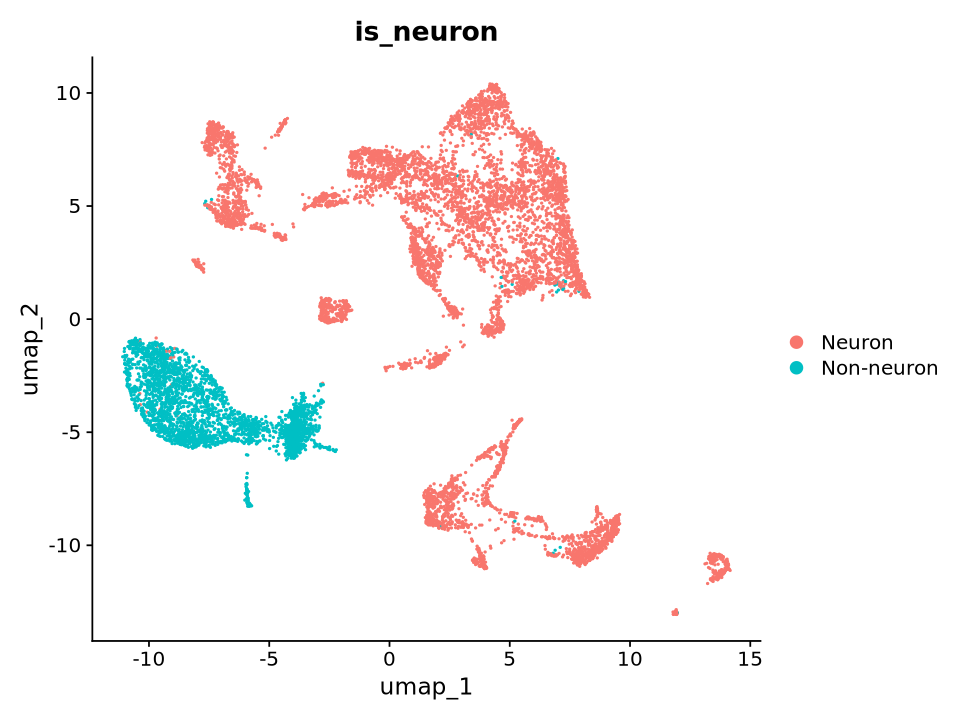

In [38]:
options(repr.plot.width=8, repr.plot.height=6)
DimPlot(multiome.combined, reduction = "umap", group.by = "is_neuron")

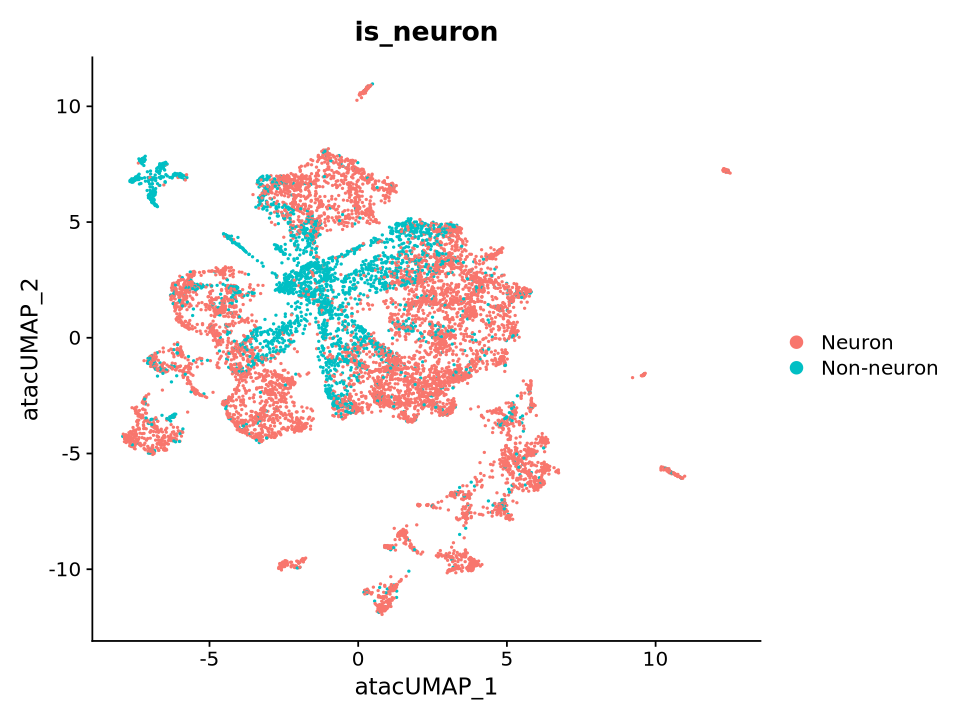

In [39]:
options(repr.plot.width=8, repr.plot.height=6)
DimPlot(multiome.combined, reduction = "umap.atac", group.by = "is_neuron")

#### 4.4.2 New embeddings on subsetted object

Finding variable features for layer counts.1

Finding variable features for layer counts.2

Finding variable features for layer counts.3

Finding variable features for layer counts.4

Finding variable features for layer counts.5

Centering and scaling data matrix

PC_ 1 
Positive:  Enah, F2r, Etv1, Phox2b, Ddah1, Rgs9, Cntn5, Vat1l, Fgf1, Kcnq3 
	   Fgf14, Hoxb5, Ncam2, Chrna3, Abcb1a, Pcsk1, Fxyd6, Slc5a7, Tbx3, Ngfr 
	   mt-Nd5, Lgals1, Unc5d, Fhod3, Cacna1e, Slc2a13, Eya1, Parva, Unc5c, Ncald 
Negative:  Plxnc1, Grik1, Syt7, Acpp, Dok4, Mmp25, Magi3, Rgs10, Pitpnc1, Tmem45b 
	   Phf24, Prdm12, Pla2g7, Cdh1, Paqr5, Tmem233, Trpc3, Mrgprd, S100a6, Gna14 
	   Gabbr2, Kcnip2, Ctsl, Cd44, Ppm1j, Rims1, Bnc2, Tmem79, Gfra2, Ctxn3 
PC_ 2 
Positive:  Plcb3, Scn10a, Syt4, Hs6st2, Pgm2l1, Gng2, Dkk3, Samd14, Fxyd2, Kcnip4 
	   Dgki, Itga2, Prkca, Trpv1, Chl1, Ass1, Jak1, Sertm1, Tmem158, Tbx3 
	   Hs3st4, Ngfr, Ret, Gpr149, Chrna3, Cd55, Gpr161, Cysltr2, Nt5dc3, Terf1 
Negative:  Fxyd7, Tafa2

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7418
Number of edges: 230774

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8987
Number of communities: 31
Elapsed time: 0 seconds


UMAP will return its model

17:09:19 UMAP embedding parameters a = 0.9922 b = 1.112

17:09:19 Read 7418 rows and found 20 numeric columns

17:09:19 Using Annoy for neighbor search, n_neighbors = 30

17:09:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:09:20 Writing NN index file to temp file /tmp/RtmpHkTz4b/file18100758045077

17:09:20 Searching Annoy index using 1 thread, search_k = 3000

17:09:22 Annoy recall = 100%

17:09:24 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:09:26 Initializing from normalized Laplacian + noise (using RSpectra)

17:09:26 Commencing optimization for 500 epochs, with 296374 positive edges

17:09:36 Optimization finished



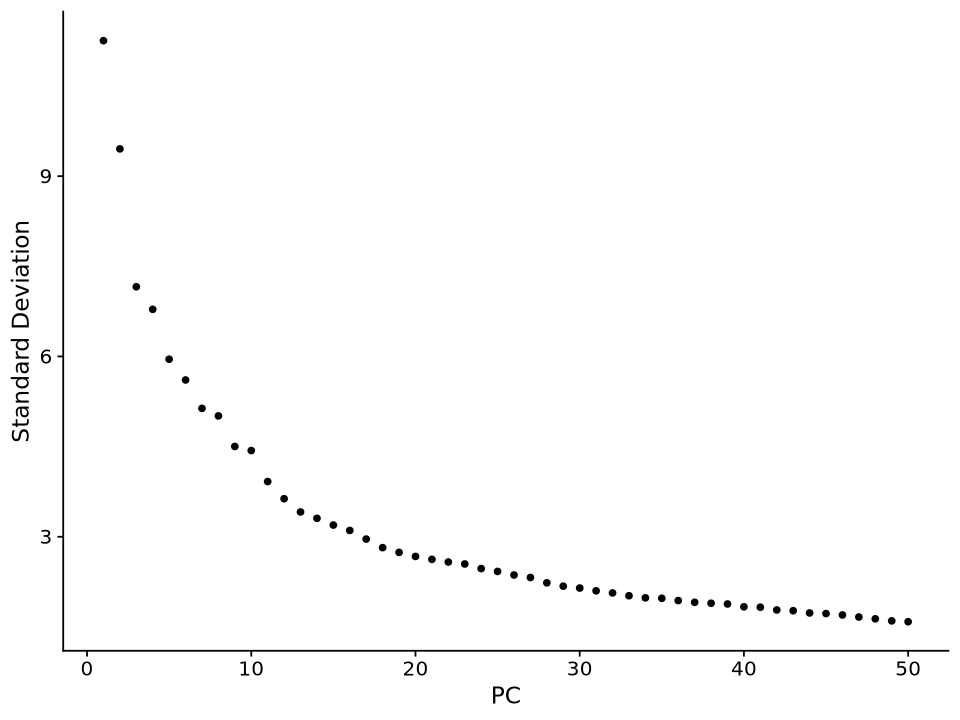

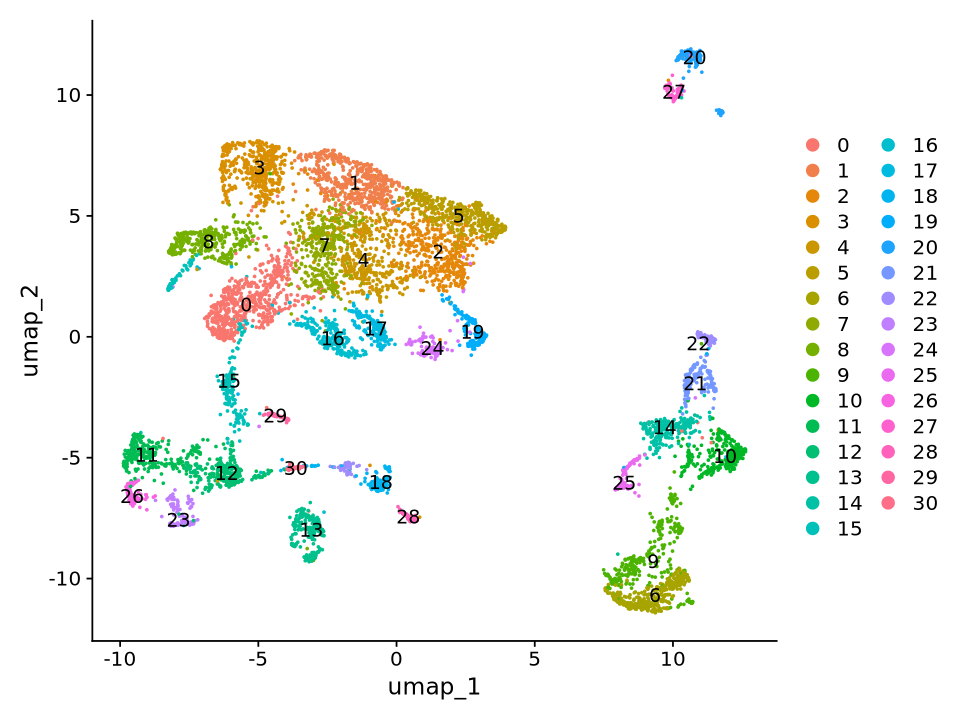

In [40]:
DefaultAssay(multiome.combined.neurons) <- "RNA"

multiome.combined.neurons <- FindVariableFeatures(object =  multiome.combined.neurons, selection.method = "vst", nfeatures = 2000)

all.genes <- rownames(x =  multiome.combined.neurons)

# Scale the data and run PCA
multiome.combined.neurons <- ScaleData(object =  multiome.combined.neurons, features = all.genes)
multiome.combined.neurons <- RunPCA(object =  multiome.combined.neurons, features = VariableFeatures(object =  multiome.combined.neurons))
print(ElbowPlot(object =  multiome.combined.neurons, ndims = 50))

# Run UMAP and clustering
multiome.combined.neurons <- FindNeighbors(object =  multiome.combined.neurons, dims = 1:20)
multiome.combined.neurons <- FindClusters(object =  multiome.combined.neurons, resolution = 1.0) #2.0 before
multiome.combined.neurons <- RunUMAP(object =  multiome.combined.neurons, dims = 1:20, return.model=TRUE)

# Visualize embedding
DimPlot(object =  multiome.combined.neurons, reduction = "umap", label=TRUE, pt.size = 0.25)

## 5. Map to Prescott et al. (2020)

### 5.1 Prepare reference object

In [41]:
load(reference_data_path)

In [42]:
aggregate.combined <- UpdateSeuratObject(aggregate.combined)
aggregate.combined <- RunUMAP(object = aggregate.combined, reduction = "pca", dims = 1:20, return.model=TRUE)
aggregate.combined$renamed_clusters <-Idents(aggregate.combined)
multiome_anchors <- FindTransferAnchors(reference = aggregate.combined, query = multiome.combined.neurons, dims = 1:30, reference.reduction = "pca")
multiome.combined.neurons <- MapQuery(anchorset = multiome_anchors, query = multiome.combined.neurons, reference = aggregate.combined, refdata = list(predicted_clusters = "renamed_clusters"), reference.reduction = "pca", reduction.model = "umap")

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Updating matrix keys for DimReduc 'pca'

Updating matrix keys for DimReduc 'umap'

Updating matrix keys for DimReduc 'tsne'

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Updating slots in integrated

Updating slots in integrated_nn

Setting default assay of integrated_nn to integrated

Updating slots in integrated_snn

Setting default assay of integrated_snn to integrated

Updating slots in pca

Updating slots in umap

Setting umap DimReduc to global

Updating slots in tsne

Setting tsne DimReduc to global

No assay information could be found for FindIntegrationAnchors

No assay information could be found for IntegrateData

Setting assay used for ScaleData.integrated to integrated

Setting assay used for RunPCA.integrated to integrated

Setting assay used for RunUMAP.integrated.pca to integrated

No assay information

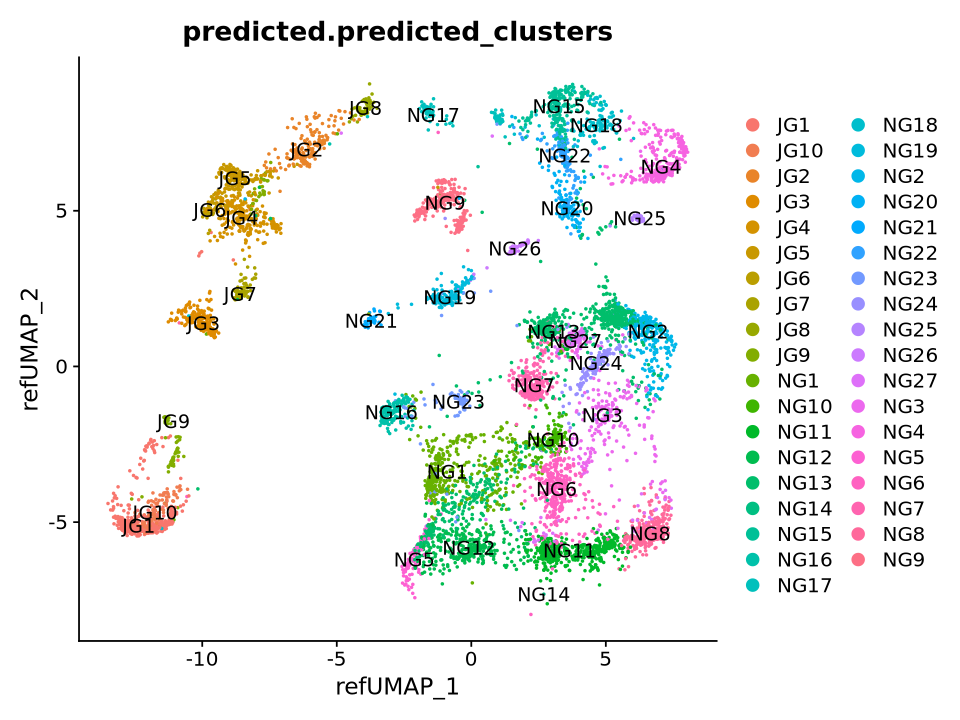

In [43]:
DimPlot(multiome.combined.neurons, group.by = "predicted.predicted_clusters",reduction = "ref.umap", label = T)

In [44]:
# Create a new column for the combined condition

get_condition <- function(cell_name) {
  if (startsWith(cell_name, "NT_")) return("NT")
  if (startsWith(cell_name, "PBS_C_")) return("PBS_C")
  if (startsWith(cell_name, "OVA_C_")) return("OVA_C")
  if (startsWith(cell_name, "PBS_")) return("PBS")
  if (startsWith(cell_name, "OVA_")) return("OVA")
  return(NA)
}

multiome.combined.neurons$condition <- sapply(colnames(multiome.combined.neurons), get_condition)

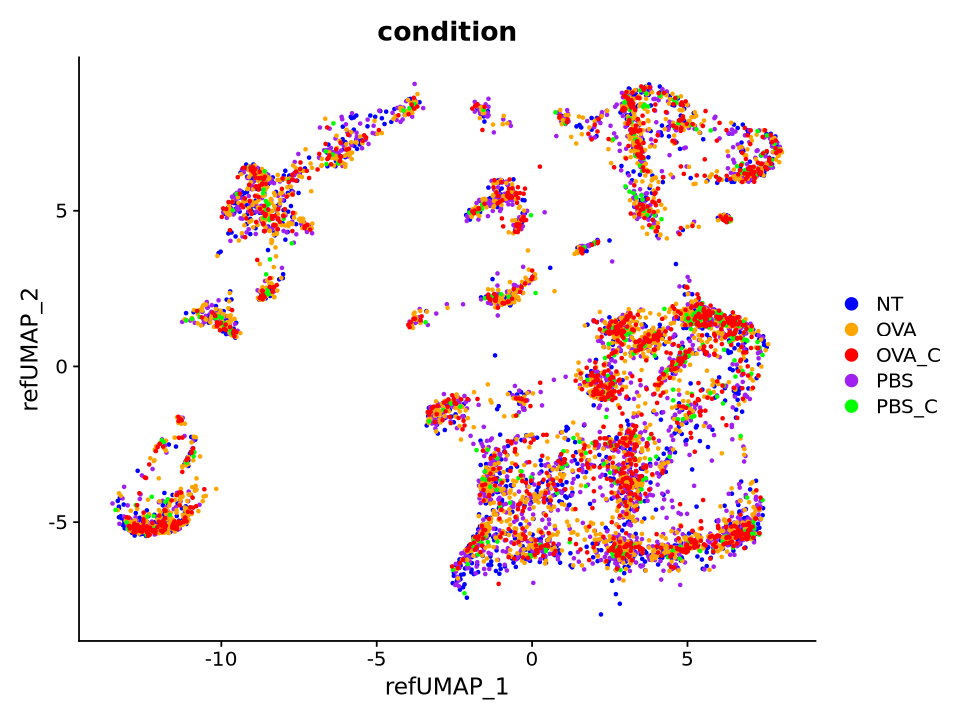

In [45]:
DimPlot(multiome.combined.neurons, group.by = "condition",reduction = "ref.umap", cols = c("blue", "orange", "red", "purple", "green"), pt.size = 0.5)

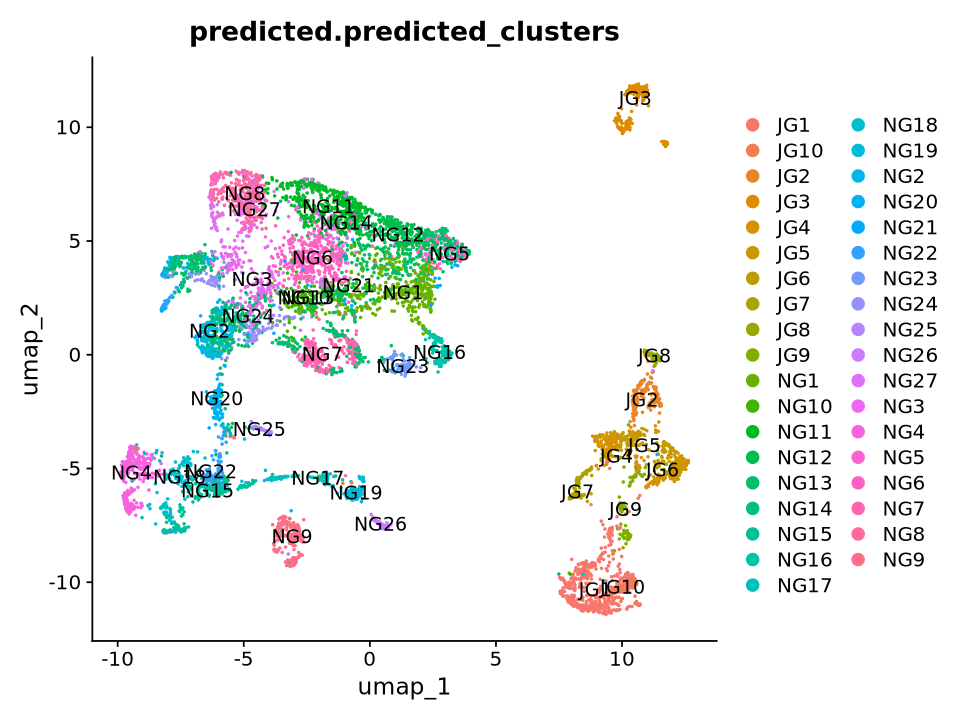

In [46]:
DimPlot(multiome.combined.neurons, group.by = "predicted.predicted_clusters",reduction = "umap", label = T)

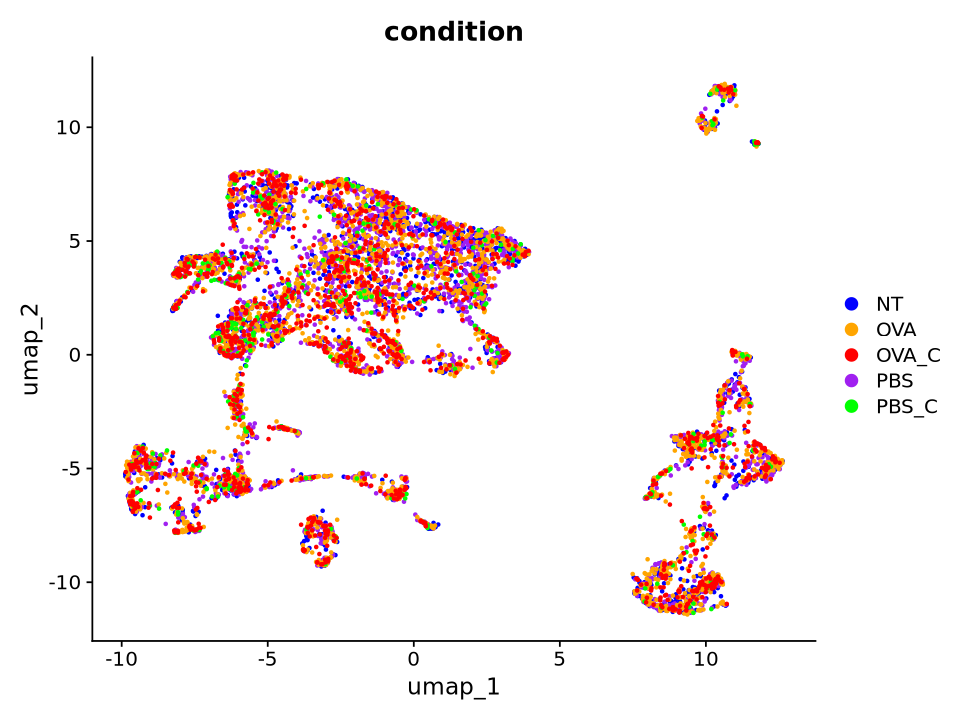

In [47]:
DimPlot(multiome.combined.neurons, group.by = "condition",reduction = "umap", cols = c("blue", "orange", "red", "purple", "green"), pt.size = 0.5)

### 5.1 Check # cells per condition per subtype

In [48]:
# check metadata columns and create a 2-way contingency table of the predicted.predicted_clusters and condition

table(multiome.combined.neurons$predicted.predicted_clusters, multiome.combined.neurons$condition)

      
        NT OVA OVA_C PBS PBS_C
  JG1  141 155    78  99    14
  JG10  22  44    21  13     3
  JG2   45  48    21  49     5
  JG3   58  78    20  50    15
  JG4   46  93    40  51    10
  JG5   49  56    33  46     8
  JG6   10   7     4  10     0
  JG7   13  40    12  15    11
  JG8    9  22     6  10     3
  JG9   25  35    20  14     4
  NG1   96 104    56 124    20
  NG10  19  35    40  38     4
  NG11 117 126    75 125    19
  NG12  83  79    44  91     8
  NG13 160 305   179 208    60
  NG14   1   0     0   0     0
  NG15  41  62    48  49    19
  NG16  26  32    25  51     5
  NG17  19  23    10  39     3
  NG18  25  38    25  29     8
  NG19  22  41    22  42     4
  NG2   44  61    58  56    30
  NG20  13  31    23  30    14
  NG21   2  10     7   8     1
  NG22  23  42    30  36     8
  NG23  15  29     9  27     2
  NG24  20  37    38  41    12
  NG25  11  15    10   9     4
  NG26  19  12     7  16     4
  NG27  38  73    22  55     6
  NG3   44  65    44  63    20
 

In [49]:
# check the sum of all values of table above
sum(table(multiome.combined.neurons$predicted.predicted_clusters, multiome.combined.neurons$condition))

[1] 7418

In [50]:
multiome.combined.neurons

An object of class Seurat 
362679 features across 7418 samples within 4 assays 
Active assay: RNA (32285 features, 2000 variable features)
 11 layers present: counts.1, counts.2, counts.3, counts.4, counts.5, data.1, data.2, data.3, data.4, data.5, scale.data
 3 other assays present: ATAC, ACTIVITY, prediction.score.predicted_clusters
 6 dimensional reductions calculated: lsi, umap.atac, pca, umap, ref.pca, ref.umap

## 5.2 Check distribution of subtypes per condition

Check for any subtype imbalance in relative abundance across conditions

In [51]:
# Compute proportions of each cluster in each condition

compute_proportions <- function(clusters, conditions) {
  # Create a contingency table
  contingency_table <- table(clusters, conditions)
  
  # Calculate proportions
  proportions <- prop.table(contingency_table, margin = 2)
  
  return(proportions)
}


In [52]:
# Example usage
proportions <- compute_proportions(multiome.combined.neurons$predicted.predicted_clusters, multiome.combined.neurons$condition)
print(proportions)

        conditions
clusters           NT          OVA        OVA_C          PBS        PBS_C
    JG1  0.0893536122 0.0710683173 0.0579494799 0.0514285714 0.0360824742
    JG10 0.0139416984 0.0201742320 0.0156017831 0.0067532468 0.0077319588
    JG2  0.0285171103 0.0220082531 0.0156017831 0.0254545455 0.0128865979
    JG3  0.0367553866 0.0357634113 0.0148588410 0.0259740260 0.0386597938
    JG4  0.0291508238 0.0426409904 0.0297176820 0.0264935065 0.0257731959
    JG5  0.0310519645 0.0256762953 0.0245170877 0.0238961039 0.0206185567
    JG6  0.0063371356 0.0032095369 0.0029717682 0.0051948052 0.0000000000
    JG7  0.0082382763 0.0183402109 0.0089153046 0.0077922078 0.0283505155
    JG8  0.0057034221 0.0100871160 0.0044576523 0.0051948052 0.0077319588
    JG9  0.0158428390 0.0160476845 0.0148588410 0.0072727273 0.0103092784
    NG1  0.0608365019 0.0476845484 0.0416047548 0.0644155844 0.0515463918
    NG10 0.0120405577 0.0160476845 0.0297176820 0.0197402597 0.0103092784
    NG11 0.07414448

## 6. Save object

In [53]:
saveRDS(multiome.combined.neurons, file=file.path(output_dir, "Asthma_Multiome_Combined_NeuronsOnly_Filtered.rds"))

## ```sessionInfo()```

In [54]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Rocky Linux 8.9 (Green Obsidian)

Matrix products: default
BLAS/LAPACK: /home/luoxingj/miniconda3/envs/single_cell/lib/libopenblasp-r0.3.29.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1             ggpointdensity_0.1.0      
 [3] viridis_0.6.5              viridisLite_0.4.2         
 [5] lubridate_1.9.3            forcats_1.0.0             
 [7] stri

# END